In [1]:

import cv2
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

from torchvision.transforms.v2.functional import perspective
from torchvision.transforms import functional as F

(-0.5, 1919.5, 1199.5, -0.5)

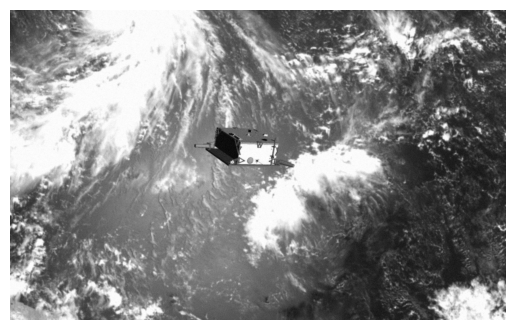

In [10]:
image_cv = cv2.imread('img008549.jpg')
# 用plotlib显示原图
plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [6]:
image_pil = Image.open('img000001.jpg')
image_pil.show()

In [7]:
wrap_matrix = np.array([[1, 0, 100], [0, 1, 50], [0, 0, 1]], dtype=np.float32)

In [26]:
%%timeit
cv2.warpPerspective(image_cv, wrap_matrix, (image_cv.shape[1], image_cv.shape[0]))

1.52 ms ± 23.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [25]:
%%timeit -r 7
image_pil.transform((image_pil.width, image_pil.height), Image.PERSPECTIVE, wrap_matrix.flatten(), resample=Image.BILINEAR)

17.6 ms ± 191 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
input_tensor = F.to_tensor(image_pil).cuda()

In [14]:
input_tensor.device

device(type='cuda', index=0)

In [ ]:
%%timeit
F.perspective(input_tensor, [[1, 1], [1, 50], [50, 1], [50, 50]], [[1, 1], [1, 50], [50, 1], [50, 50]], interpolation=Image.BILINEAR)

In [13]:
%%timeit
image_INTER_LINEAR = cv2.resize(image_cv, (784, 480), cv2.INTER_LINEAR)

283 µs ± 6.39 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


(-0.5, 783.5, 479.5, -0.5)

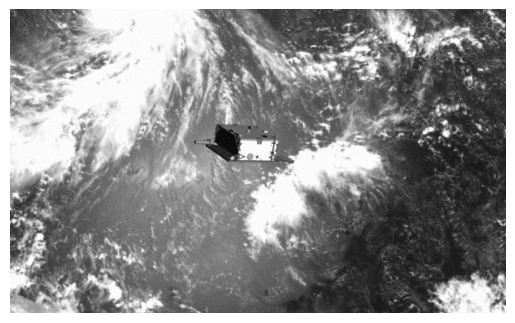

In [14]:
plt.imshow(cv2.cvtColor(cv2.resize(image_cv, (784, 480), cv2.INTER_LINEAR), cv2.COLOR_BGR2RGB))
plt.axis('off')

In [15]:
%%timeit
cv2.resize(image_cv, (784, 480), cv2. INTER_AREA)

277 µs ± 5.26 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


(-0.5, 783.5, 479.5, -0.5)

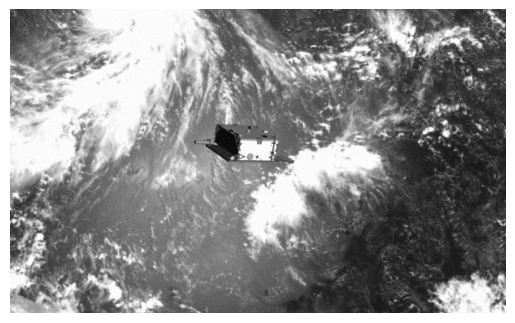

In [16]:
plt.imshow(cv2.cvtColor(cv2.resize(image_cv, (784, 480), cv2.INTER_AREA), cv2.COLOR_BGR2RGB))
plt.axis('off')